<a href="https://colab.research.google.com/github/slpires/IGTIDesenvolvedorPython/blob/master/aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#mostrando o funcionamento do garbage collection
import sys  #módulo utilizado gerar as interações com o sistema

In [3]:
help(sys)

Help on built-in module sys:

NAME
    sys

MODULE REFERENCE
    https://docs.python.org/3.6/library/sys
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    This module provides access to some objects used or maintained by the
    interpreter and to functions that interact strongly with the interpreter.
    
    Dynamic objects:
    
    argv -- command line arguments; argv[0] is the script pathname if known
    path -- module search path; path[0] is the script directory, else ''
    modules -- dictionary of loaded modules
    
    displayhook -- called to show results in an interactive session
    excepthook -- called to handle any uncaught exception other than SystemExit
      To customize printing 

In [4]:
minha_string='IGTI'   #realizando a atribuição a uma variável

In [5]:
sys.getrefcount(minha_string)  #analisando o contador de referencias

2

In [6]:
#criando uma lista com o objeto minha string
minha_lista=[minha_string]

In [7]:
sys.getrefcount(minha_string)  #analisando o contador de referencias

3

In [8]:
#criando um dicionário com a minha_string
meu_dicionario={'chave':minha_string}

In [9]:
sys.getrefcount(minha_string)  #analisando o contador de referencias

4

In [10]:
#deletando um elemento
del meu_dicionario

In [11]:
sys.getrefcount(minha_string)  #analisando o contador de referencias

3

In [12]:
#deletando a lista
del minha_lista

In [13]:
sys.getrefcount(minha_string)  #analisando o contador de referencias

2

**Generational garbage collector**

In [14]:
#criando uma lista vazia
lista=[]

In [15]:
lista.append(lista)  #adicionando a lista para a lista

In [16]:
lista

[[...]]

In [17]:
lista_2=[]

In [18]:
lista_2

[]

In [19]:
id(lista)

140618600412360

In [20]:
import gc  #utilizado para empregar o gc



*   geração 0 - executa o garbage collection -> sobreviventes -> geração 1
*   geração 1 - executa o garbage collection -> sobreviventes -> geração 2
*   geração 2


In [21]:
gc.get_threshold()

(700, 10, 10)

In [23]:
#classe nó 
class Nos:
  def __init__(self,valor):
    self.valor=valor
  def relaciona(self,relaciona):
    self.relaciona=relaciona

In [24]:
raiz=Nos('raiz')
esquerdo=Nos('esquerdo')
direito=Nos('direito')

In [25]:
raiz.valor

'raiz'

In [26]:
raiz.relaciona(esquerdo)
esquerdo.relaciona(direito)
direito.relaciona(esquerdo)

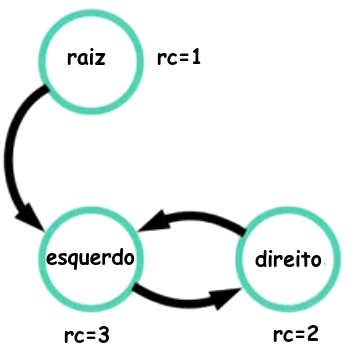

In [27]:
sys.getrefcount(raiz)  #analisando o contador de referencias

2

In [28]:
sys.getrefcount(esquerdo)  #analisando o contador de referencias

4

In [29]:
sys.getrefcount(direito)  #analisando o contador de referencias

3

In [30]:
#deletando os elementos
del raiz
del esquerdo
del direito

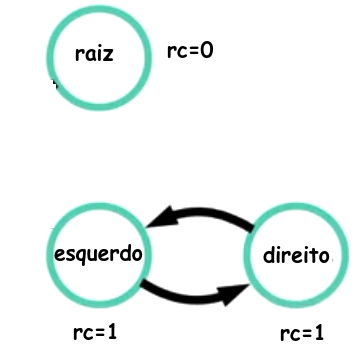

In [31]:
sys.getrefcount(direito)  #analisando o contador de referencias

NameError: ignored

In [32]:
gc.set_debug(gc.DEBUG_SAVEALL) #utilizado para salvar os estados 

In [33]:
lst = []
lst.append(lst)
lst_address = id(lst)

In [34]:
del lst

In [35]:
object_1 = {}
object_2 = {}
object_1['obj2'] = object_2
object_2['obj1'] = object_1
obj_address = id(object_1)

In [36]:
del object_1, object_2

In [37]:
gc.collect()  #conta a quantidade de variáveis "deletadas"

104

In [38]:
print(sys.getrefcount(obj_address))
print(sys.getrefcount(lst_address))

2
2


In [39]:
gc.get_count()

(108, 0, 0)